# 6 - Candele Giapponesi e Volumi - Bis

## Caricamento librerie/moduli

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import metcomputlib as mc
import myownlib as my

In [2]:
mc.Ver()

------------------------------------------------------------------------------------------
Sunday, March 16, 2025, 14:37:11
Platform : macOS-15.3.2-arm64-arm-64bit
------------------------------------------------------------------------------------------
Python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
JupyterLab 4.3.4
------------------------------------------------------------------------------------------
Matplotlib 3.9.2
Pandas 2.2.2
NumPy 1.26.4
SciPy 1.13.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [3]:
# load AAPL.csv in a DataFrame
Aapl = mc.ReadStockPrices('AAPL.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-01-23')
day3 = np.datetime64('2000-02-15')

In [4]:
# extract single columns from DataFrame
D = Aapl['Date'].values
O = Aapl['Open'].values
H = Aapl['High'].values
L = Aapl['Low'].values
C = Aapl['Close'].values
V = Aapl['Volume'].values

## Calcolo Linee Centrali

In [5]:
p1 = 5
p2 = 14
HP1, LP1 = my.Lhl(H, L, p1)
HP2, LP2 = my.Lhl(H, L, p2)
LC1 = (HP1 + LP1) / 2
LC2 = (HP2 + LP2) / 2

## Figura con function da libreria myownlib.py

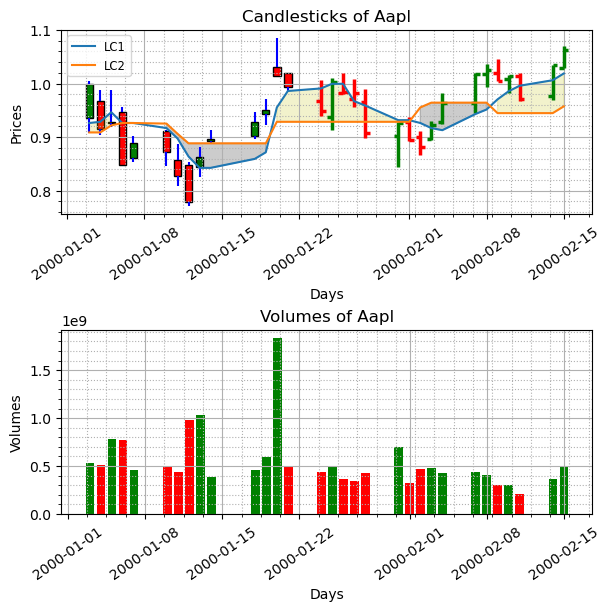

In [6]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
my.PlotCandles(D, O, H, L, C, day1, day2)
my.PlotOHLC(D, O, H, L, C, day2, day3)
my.PlotData(D, LC1, day1, day3, Label='LC1')
my.PlotData(D, LC2, day1, day3, Label='LC2')
mc.FillBetween(D, LC1, LC2, day1, day3, Color='y')
mc.FillBetween(D, LC2, LC1, day1, day3, Color='k')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Candlesticks of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
my.PlotVolumes(D, C, V, day1, day3)
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='Volumes of Aapl')
#
plt.show()